1.API Connection

Choose a weather API (e.g., OpenWeatherMap – free with registration).

Get an API key and test it with a single city.

Request data like:

City name

Temperature (°C)

Humidity (%)

Wind speed (m/s or km/h)

Weather description (e.g., “clear sky”)

In [1]:
import requests
import pandas as pd

lat = "43.37135"
lon = "-8.396"
api_key = "c39e2eb461bd81631bba903be89d1c67"

url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric&lang=es"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    ciudad = data.get('name')
    temperatura = data['main']['temp']
    humedad = data['main']['humidity']
    velocidad_viento = data['wind']['speed']
    descripcion = data['weather'][0]['description']

    df = pd.DataFrame({
        'Ciudad': [ciudad],
        'Temperatura (°C)': [temperatura],
        'Humedad (%)': [humedad],
        'Velocidad del viento (m/s)': [velocidad_viento],
        'Descripción': [descripcion]
    })
    print(df)
else:
    print(f"Error en la solicitud: {response.status_code}")


     Ciudad  Temperatura (°C)  Humedad (%)  Velocidad del viento (m/s)  \
0  A Coruña             11.01           90                         7.2   

       Descripción  
0  llovizna ligera  


Este código obtiene datos meteorológicos actuales de A Coruña mediante la API.Extrae nombre de la ciudad, temperatura , humedad, velocidad del viento y la descripción del clima.

2. Data Collection

Create a list of at least 20 cities from different continents.

Use a Python loop to request data for each city and store the results.

Build a pandas DataFrame with one row per city.

In [2]:
import requests
import pandas as pd

api_key = "c39e2eb461bd81631bba903be89d1c67"

cities = [
    "Cairo,EG", "Lagos,NG", "Johannesburg,ZA", "OPORTO,PT",
    "Tokyo,JP", "New Delhi,IN", "Lima,PE", "Shanghai,CN",
    "London,GB", "PARIS,FR", "Madrid,ES", "Moscow,RU",
    "Mexico City,MX", "New York,US", "Toronto,CA",
    "São Paulo,BR", "Buenos Aires,AR", "Bogotá,CO",
    "Sydney,AU", "Helsinki,FI"
]

def get_weather(city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric&lang=es"
    resp = requests.get(url)

    if resp.status_code == 200:
        d = resp.json()

        return {
            "Ciudad": d.get('name'),
            "Temperatura (°C)": d['main']['temp'],
            "Humedad (%)": d['main']['humidity'],
            "Velocidad del viento (m/s)": d['wind']['speed'],
            "Descripción": d['weather'][0]['description'],
            "Nivel del mar": d["main"].get("sea_level"),
            "Continente": d["sys"]["country"],

        }
    else:
        return None


data = []
for city in cities:
    weather = get_weather(city)
    if weather:
        data.append(weather)

df = pd.DataFrame(data)
print(df)


          Ciudad  Temperatura (°C)  Humedad (%)  Velocidad del viento (m/s)  \
0          Cairo             21.42           49                        4.63   
1          Lagos             27.94           79                        3.93   
2   Johannesburg             17.90           64                        1.88   
3          Porto             10.40           73                        3.26   
4          Tokyo             12.41           66                        3.09   
5      New Delhi             14.09           67                        1.03   
6           Lima             20.14           78                        4.12   
7       Shanghai             11.92           76                        2.00   
8         London             11.55           91                        7.20   
9          Paris              7.21           81                        6.69   
10        Madrid              8.89           70                        2.57   
11        Moscow             -0.11           57     

Obtiene datos meteorológicos actuales de 20 ciudades usando la API.
Crea un DataFrame de pandas con 20 filas e imprime la tabla con todas las columnas.Consulta la API para cada ciudad, extrae temperatura, humedad, viento, descripción, presión a nivel del mar y código de país.

3. Data Cleaning

Check for missing or inconsistent data (e.g., failed requests).

Format numeric columns correctly (e.g., convert Kelvin to Celsius if needed).

Save your data to a CSV file.

In [3]:
missing = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing)

Valores faltantes por columna:
Ciudad                        0
Temperatura (°C)              0
Humedad (%)                   0
Velocidad del viento (m/s)    0
Descripción                   0
Nivel del mar                 0
Continente                    0
dtype: int64


In [4]:
df['Temperatura (°C)'] = pd.to_numeric(df['Temperatura (°C)'], errors='coerce')
df['Humedad (%)'] = pd.to_numeric(df['Humedad (%)'], errors='coerce')
df['Velocidad del viento (m/s)'] = pd.to_numeric(df['Velocidad del viento (m/s)'], errors='coerce')


Miramos los datos nulos y normalizamos datos de entrada imperfectos, transformándolos en formatos adecuados para análisis en pandas.

In [5]:
df.to_csv("weather_data.csv", index=False)
print("Datos guardados en weather_data.csv")
print(df)

Datos guardados en weather_data.csv
          Ciudad  Temperatura (°C)  Humedad (%)  Velocidad del viento (m/s)  \
0          Cairo             21.42           49                        4.63   
1          Lagos             27.94           79                        3.93   
2   Johannesburg             17.90           64                        1.88   
3          Porto             10.40           73                        3.26   
4          Tokyo             12.41           66                        3.09   
5      New Delhi             14.09           67                        1.03   
6           Lima             20.14           78                        4.12   
7       Shanghai             11.92           76                        2.00   
8         London             11.55           91                        7.20   
9          Paris              7.21           81                        6.69   
10        Madrid              8.89           70                        2.57   
11        Moscow

Crea un nuevo csv con los datos limpios.

4. Data Analysis

Answer questions such as:

Which cities are the hottest and coldest right now?

  - Las ciudades mas calidas ahoa mismo son: Cairo, Lagos y São Paulo.
  - Las más frias: Moscow, Hesinki, Paris.

Is there a relationship between temperature and humidity?

- No hay relación entre la temperatura y la humedad dado que hay ciudades frias muy humedas y ciudades cálidas tanto humedas (Lagos) como secas (Cairo).

Which continent seems to have the windiest cities?
- El continente que puede tener las ciudades con más viento es América del norte cuyas ciudades son New York y Toronto.

What’s the most common weather description (e.g., clear, cloudy, rainy)?

- La descripción más comun en el conjunto de ciudades es cielo despejado.



5. Visualization

Create at least two charts (using matplotlib or pandas):

Example 1: Bar chart of average temperature by continent.

Example 2: Scatter plot of temperature vs humidity.

Gráfico 1 – Temperatura promedio por continente (Bar Chart)

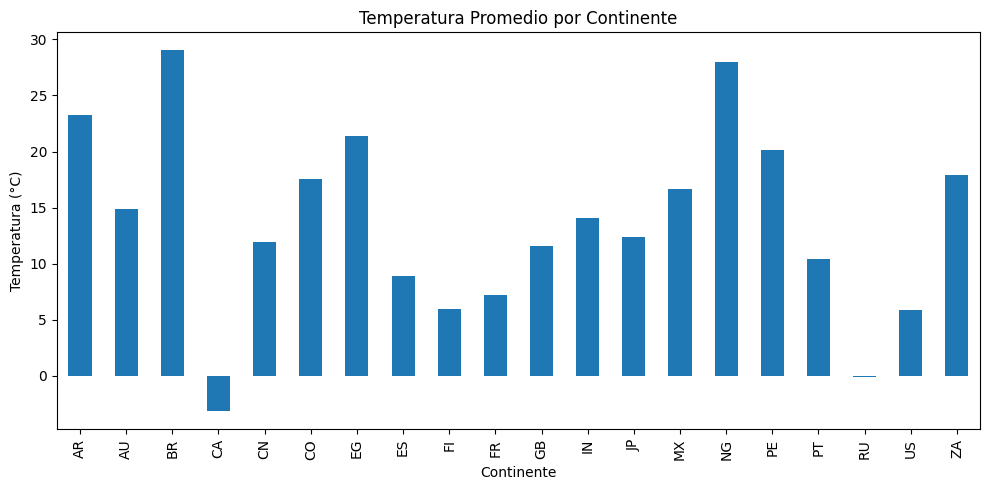

In [6]:
import matplotlib.pyplot as plt

avg_temp = df.groupby("Continente")["Temperatura (°C)"].mean()

plt.figure(figsize=(10, 5))
avg_temp.plot(kind="bar")
plt.title("Temperatura Promedio por Continente")
plt.xlabel("Continente")
plt.ylabel("Temperatura (°C)")
plt.tight_layout()
plt.show()


Muestra la temperatura promedio de cada continente.

Gráfico 1 – Temperatura promedio por continente (Bar Chart)

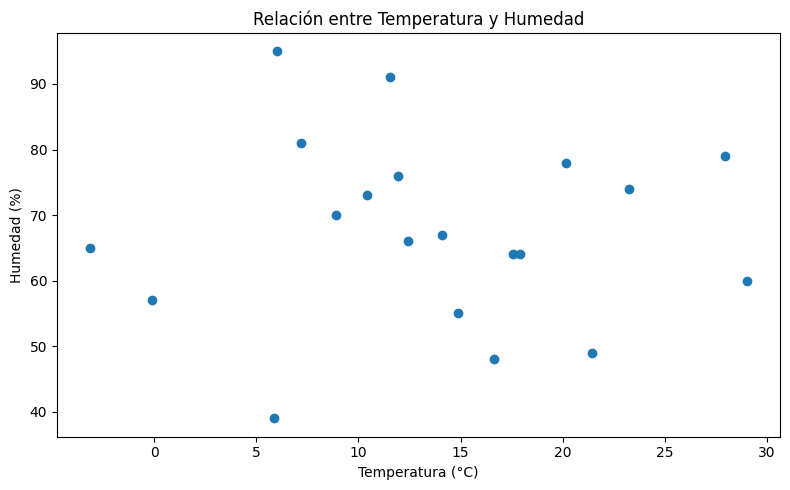

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df["Temperatura (°C)"], df["Humedad (%)"])
plt.title("Relación entre Temperatura y Humedad")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad (%)")
plt.tight_layout()
plt.show()


Se observa la relación entre la temperatura y la humedad en las diferentes ciudades. A temperaturas más altas, la humedad tiende a ser más baja y
temperauras más bajas están asociadas con humedades más altas.

6. Summary

Write a short report (Markdown cell):

Describe your process (API requests, data cleaning, analysis).

Highlight interesting patterns.

Mention any difficulties or limitations you encountered.

1. Describe your process (API requests, data cleaning, analysis).

Primero realicé solicitudes a la API de OpenWeatherMap para obtener datos del clima de varias ciudades del mundo. De cada respuesta extraje temperatura, humedad, presión, velocidad del viento y una descripción del clima.
Luego organicé toda la información en un DataFrame de pandas, revisé si había valores faltantes y convertí las columnas numéricas a su tipo correcto.
Finalmente, analicé los datos comparando las condiciones climáticas entre continentes y creando visualizaciones como un gráfico de barras y un diagrama de dispersión.

2. Highlight interesting patterns


La temperatura promedio fue diferente entre continentes, mostrando qué regiones eran más cálidas o más frías.

El gráfico de dispersión mostró que la temperatura y la humedad no tienen una relación fuerte.

Algunas ciudades de zonas geográficas similares compartían características climáticas parecidas.


3. Mention any difficulties or limitations you encountered.


Algunas solicitudes a la API fallaron o devolvieron datos incompletos.

La API solo proporciona datos actuales, lo que impide hacer análisis históricos o de tendencias.

No todas las ciudades devolvieron información 100% consistente, lo que limitó ligeramente el análisis.